In [46]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [47]:
# Adjust paths as necessary
path_to_train = 'sample_data/train.csv'

# Load the datasets
train_data = pd.read_csv(path_to_train)

# Prepare the data
X = train_data.drop('Transported', axis=1)
y = train_data['Transported'].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display some of the training data
print(X_train.head())
print(y_train.head())

# Define columns
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set up preprocessing for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize the model
model = LogisticRegression(max_iter = 1000)

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Fit the model
clf.fit(X_train, y_train)


     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
2333     2513_01      Earth     False       NaN  TRAPPIST-1e  28.0  False   
2589     2774_02      Earth     False   F/575/P  TRAPPIST-1e  17.0  False   
8302     8862_04     Europa      True   C/329/S  55 Cancri e  28.0  False   
8177     8736_02       Mars     False  F/1800/P  TRAPPIST-1e  20.0  False   
500      0539_02     Europa      True    C/18/P  55 Cancri e  36.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  
2333          0.0       55.0           0.0  656.0     0.0     Loree Mathison  
2589          0.0     1195.0          31.0    0.0     0.0  Crisey Mcbriddley  
8302          0.0        0.0           0.0    0.0     0.0     Alramix Myling  
8177          NaN        2.0         289.0  976.0     0.0          Tros Pota  
500           0.0        0.0           0.0    0.0     0.0     Achyon Nalanet  
2333    0
2589    0
8302    1
8177    1
500     1
Name: Transpo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [48]:
# Predict on the test data
predictions = clf.predict(X_test)

# Calculate Mean Squared Error (generally not as useful for classification)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

binary_predictions = np.where(predictions >= 0.5, 1, 0)
# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Add predictions to the test data for evaluation
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Actual'] = y_test
test_data_with_predictions['Predicted'] = predictions
test_data_with_predictions['Correct'] = test_data_with_predictions['Actual'] == test_data_with_predictions['Predicted']


Mean Squared Error: 0.2213916043703278
Accuracy: 0.7786


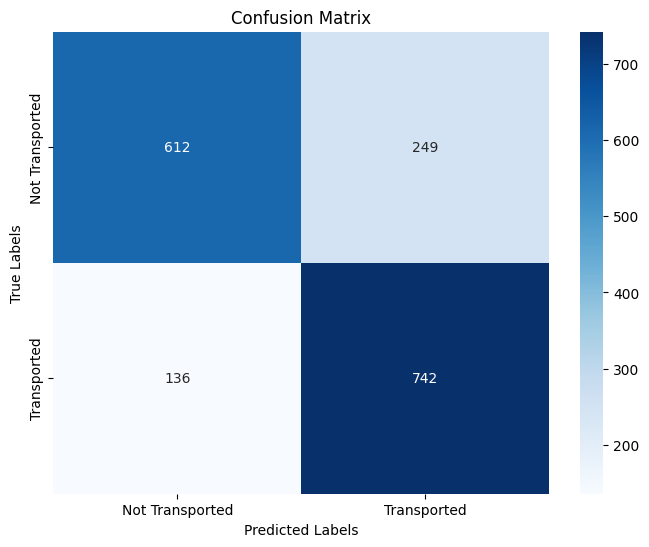

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
